__The work has been done in this script is as follows__
- Reading  the data
- Understanding the data
- Exploratory analysis of variables
- Visualization of data

In [2]:
#Importing libariries
import numpy as np
import pandas as pd
import requests
import time

_Reading data_

In [3]:
df = pd.read_csv('phddata.csv', header = 0)

_Understanding data_

In [5]:
print(df.shape)
df.columns

(3000, 6)


Index(['Unnamed: 0', 'UsedID', 'UserName', 'Review', 'Rating', 'Date'], dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0     0
UsedID         0
UserName      17
Review         0
Rating         0
Date           0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,UsedID,UserName,Review,Rating,Date
0,0,814590660,Craig W,The notebook. Upon searching the best romanti...,0.5,2019-08-24T21:46:57.257Z
1,1,977260167,Victor C,"Excelente, sensibiliza la trama.",5.0,2019-08-22T15:14:09.626Z
2,2,978109321,Garin M,It's a cheesy love story. It didn't make my cry.,1.0,2019-08-15T18:43:44.457Z
3,3,978175723,Tommy B,Must see if you want to bawl your eyes out!!,5.0,2019-07-28T16:39:29.798Z
4,4,978079261,Jason N,"Some scenes i sit there and say ""how is this c...",2.0,2019-07-25T00:59:12.500Z


### Counting words of Review column

In [8]:
df['word_count'] = [len(text.split(' ')) for text in df['Review']]

In [9]:
pd.DataFrame(df['word_count']).describe()

,word_count
count,3000.000000
mean,19.271667
std,53.760121
min,1.000000
25%,6.000000
50%,9.000000
75%,16.000000
max,1427.000000


In [10]:
#Getting the index of maximum word in the reviews
df['word_count'].idxmax()

498

In [13]:
#Getting reviews of 498th index
df.iloc[498,[3]].values

array(['By 2004, they had, like, twelve adaptations of Nicholas Sparks books, and it took them this long to get around to adapting his first one. Hey, whatever, I welcome it, because this film is actually pretty good, and we seriously need compensation for "A Walk to Remember", not just between 2002 and 2004, but still to this day, yet that didn\'t stop the critics from having some kind of bias that kept them from liking this. Hey, I can\'t say that I went into this film thinking, "From the director of \'John Q\' comes an adaptation of a book by the author of \'A Walk to Remember\' that I\'m sure will not stink", nor did I walk away finding it awesome, but make no mistake, this film is better than they say, even though it does have its cheesy moments. Hey, when this film came out, Ryan Gosling had just got done playing a Neo-Nazi and some teenager who brutally murdered people... in two separate films, so it was about time for him to do something a bit fluffier, much like Rachel McAdams

_Obsevation_
 - In 498th review maximum length(1668) of review is there. Narrated the story and each and every section of movie
 - 75% 0f data has legnth of review less than 20
 
***

## Working with Date attribute

In [15]:
#Converting data to date datatype 
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [16]:
df.dtypes

Unnamed: 0                  int64
UsedID                      int64
UserName                   object
Review                     object
Rating                    float64
Date          datetime64[ns, UTC]
word_count                  int64
dtype: object

In [18]:
import datetime as dt
from datetime import datetime

#Define a function to get month in word for better readable format

def get_month(x):
    return dt.datetime.strftime(x, format = '%b')

df['Month'] = df.loc[:,'Date'].apply(get_month)

In [20]:
df["count"]=1


In [21]:
df['year'] = df['Date'].dt.year
df.head()

,Unnamed: 0,UsedID,UserName,Review,Rating,Date,word_count,Month,count,year
0,0,814590660,Craig W,The notebook. Upon searching the best romanti...,0.5,2019-08-24 21:46:57.257000+00:00,334,Aug,1,2019
1,1,977260167,Victor C,"Excelente, sensibiliza la trama.",5.0,2019-08-22 15:14:09.626000+00:00,5,Aug,1,2019
2,2,978109321,Garin M,It's a cheesy love story. It didn't make my cry.,1.0,2019-08-15 18:43:44.457000+00:00,11,Aug,1,2019
3,3,978175723,Tommy B,Must see if you want to bawl your eyes out!!,5.0,2019-07-28 16:39:29.798000+00:00,10,Jul,1,2019
4,4,978079261,Jason N,"Some scenes i sit there and say ""how is this c...",2.0,2019-07-25 00:59:12.500000+00:00,32,Jul,1,2019


In [22]:
#Grouping total count of reviewer in year wise

temp_yearTotal=pd.Series(df[['year', 'count' ]].groupby('year')['count'].sum())
temp_yearTotal

year
2012    2125
2013     573
2014     143
2015      37
2016      30
2017      33
2018      31
2019      28
Name: count, dtype: int64

In [25]:
tempUser.keys()

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='Month')

In [24]:
#Getting total count of reviewer for each month

tempUser=pd.Series(df[['Month', 'count' ]].groupby('Month')['count'].sum())
tempUser

Month
Apr    367
Aug    184
Dec    186
Feb    110
Jan    178
Jul    439
Jun    499
Mar    117
May    477
Nov    128
Oct    155
Sep    160
Name: count, dtype: int64

In [26]:
# Monthwise Review score sum
tempUser=pd.Series(df[['Month', 'Rating' ]].groupby('Month')['Rating'].sum())
tempUser

Month
Apr    1625.0
Aug     779.5
Dec     783.0
Feb     453.0
Jan     748.5
Jul    1957.5
Jun    2224.5
Mar     489.5
May    2109.0
Nov     546.5
Oct     607.5
Sep     674.5
Name: Rating, dtype: float64

In [27]:
tempMean=pd.Series(df[['Month', 'Rating' ]].groupby('Month')['Rating'].mean())

tempMean
    

Month
Apr    4.427793
Aug    4.236413
Dec    4.209677
Feb    4.118182
Jan    4.205056
Jul    4.458998
Jun    4.457916
Mar    4.183761
May    4.421384
Nov    4.269531
Oct    3.919355
Sep    4.215625
Name: Rating, dtype: float64

__Observations:__
- Film Lion King got max review in the year 2012 based on the data retrived from 'Rotten Tomatoes' site even though the site is aquired by Warner Bros in 2011
- The film got review score an average of 4.5 during June month followed by April(4.4)

### The distribution of review sentiment polarity score

#### Getting higher polarity negative comments
- New column for sentiment polarity. Two new columns for lengths of the review and word count.

In [31]:
import textblob
from textblob import TextBlob

In [32]:
df['polarity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Review'].astype(str).apply(len)
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [33]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['Review']].sample(5).values

for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Please watch this excellent film
The best love movie ever!!!!!
This was soooo great!
Loved it, It's a tear jerker too!!
LOVE IT!!!!!!!!!!!!!!!!!!!


In [34]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['Review']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

girlfriend likes this one as well as her mom
I Cry every time I watch this movie.
Only cause it was filmed in Charleston
i have to admit it made me cry
Ryan just did it again


In [35]:
df.polarity.min()

-1.0

In [36]:
df.loc[df.polarity == -1.0]

,Unnamed: 0,UsedID,UserName,Review,Rating,Date,word_count,Month,count,year,Sentiment,polarity,review_len
247,247,953691565,Joe C,"OMG, that was awful.",1.5,2014-04-16 16:19:03+00:00,4,Apr,1,2014,1,-1.0,20
368,368,954897376,Claudio V,One of the Worst films ever made!,0.5,2013-10-08 10:45:11+00:00,7,Oct,1,2013,1,-1.0,33
688,688,940263432,Jessica J,Incredibly boring. Didn't feel anything.,2.0,2013-02-17 16:33:17+00:00,5,Feb,1,2013,1,-1.0,40
925,925,797700549,Livvy B,"sounds boring, never seen it.",1.0,2012-12-22 16:18:00+00:00,5,Dec,1,2012,1,-1.0,29
990,990,868444810,Jennifer A,Hated it! But then again I don't like movies t...,1.0,2012-12-08 13:29:01+00:00,13,Dec,1,2012,1,-1.0,62
1142,1142,936172465,Chris D,worst movie ever....she was a slut,0.5,2012-10-22 08:40:28+00:00,6,Oct,1,2012,1,-1.0,34
1439,1439,921067750,Devon B,LOVE...made me cry :'(,5.0,2012-08-12 20:35:49+00:00,4,Aug,1,2012,0,-1.0,22
1650,1650,932364039,Jeremy D,Not to bad for a Chick Flick...Kelly made me w...,4.0,2012-07-16 20:09:27+00:00,11,Jul,1,2012,0,-1.0,56
2161,2161,911409230,Raven R,A terrible adaptation of a terrible novel that...,0.5,2012-06-10 16:24:12+00:00,14,Jun,1,2012,1,-1.0,91
2621,2621,879762410,Catalina R,THIS MOVIE EFFING ROCKED!!!!!!!,5.0,2012-05-08 20:22:53+00:00,4,May,1,2012,0,-1.0,31


In [38]:
print('5 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -1.0, ['Review']].sample(5).values
for c in cl:
    print(c[0])

5 reviews with the most negative polarity: 

worst movie ever....she was a slut
Not to bad for a Chick Flick...Kelly made me watch it!!!
sounds boring, never seen it.
One of the Worst films ever made!
LOVE...made me cry :'(


_Observation_
- In the negative review "LOVE...made me cry :'(" ---> This is actually positive review, maybe because of sad smiley or because the word appearing 'cry' may made this review catogorized  as negative review

## Data visualization

### Target variable analysising

In [29]:
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x <= 3 else 0)

In [30]:
df['Sentiment'].value_counts('normalize')*100

0    84.466667
1    15.533333
Name: Sentiment, dtype: float64

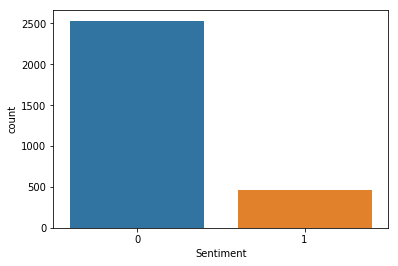

In [42]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.countplot(x='Sentiment',data=df)
plt.show()

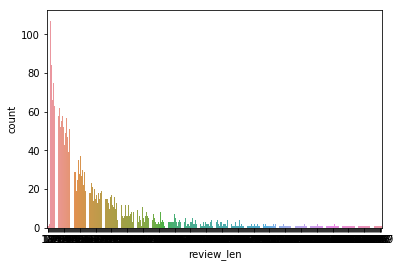

In [43]:
df['review_len'] = df['Review'].astype(str).apply(len)
sns.countplot(x='review_len',data=df)
plt.show()

### Ploting words in worldcloud

In [ ]:
#!pip install wordcloud

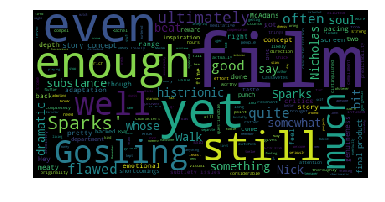

In [47]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(df['Review'][498])
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

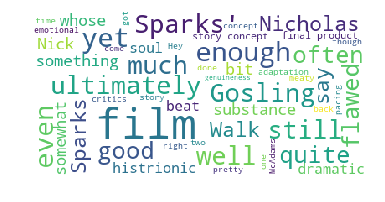

In [48]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(df['Review'][498])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Ploting most frequent words (Without stop-words)

In [69]:
stop = stopwords.words('english')
reviews_sp_removed = [token for token in df['Review'] if token not in stop]
print(reviews_sp_removed)

["The notebook.  Upon searching the best romantic films, this seems to be at the top of the pile?  WHY?\nSo, let's get into the story.   A story about a girl and a love triangle.  A girl that can't decide if she wants a bit of rough, someone who looks good with a beard, a wife beater vest and who can build things (like a house), OR.. if she wants money, someone with a good job, health insurance, keeps you hydrated and looks good in a suit.\nAnd that's it really, a few sub plots in the future but mainly her trying to decide who she wants to be with throughout; in this utterly clichéd bullsh$t film.\n\nNext the characters. So the Girl:  Indecisive.  Doesn't really do a lot for feminists. She gets married to the money and then cheats with the rough. Fantastic. Complete b*tch.\nThen, Gosling: mental problems and a narcissist.  Can't take no for an answer - in the beginning, when he gets rejected five or six times, threatens to kill himself for a date.  Sooo romantic! Later on, he writes he

In [70]:
values, counts = np.unique(reviews_sp_removed, return_counts=True)

In [54]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)

[2222 2597 1132 ...  995  986 2967]


In [55]:
values = values[sorted_indices]
counts = counts[sorted_indices]

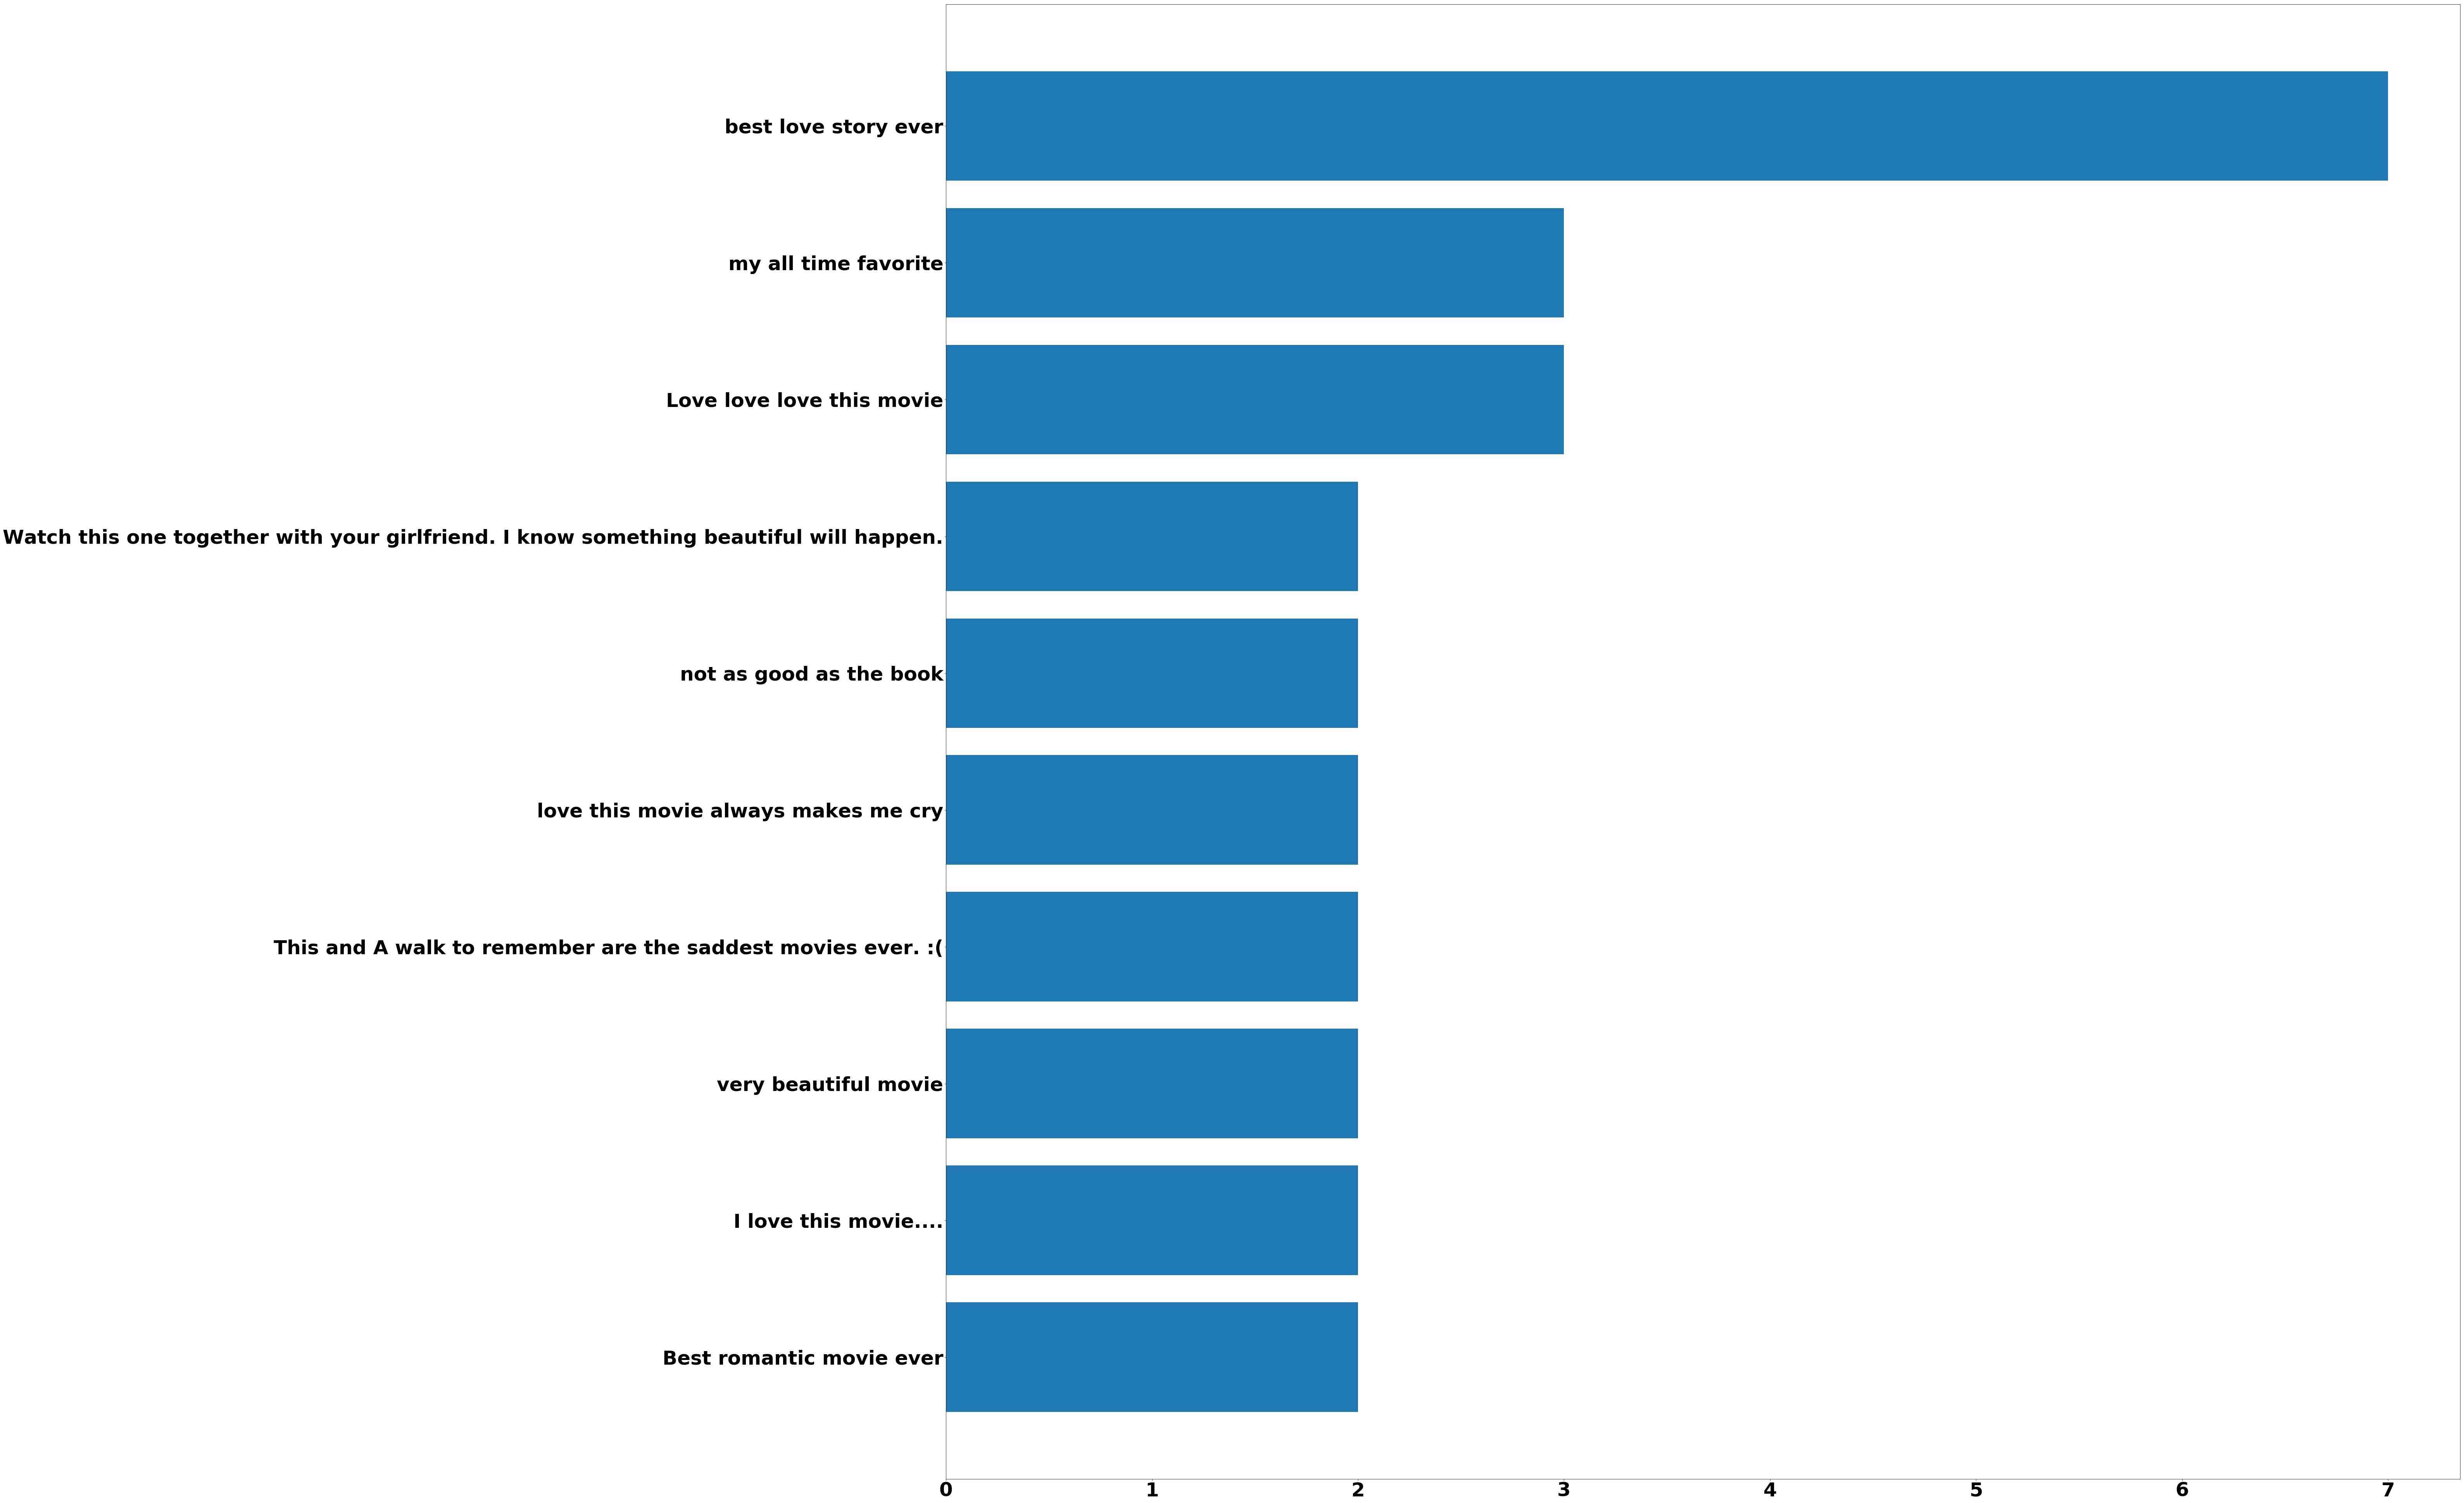

In [58]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:10], counts[:10])
plt.gca().invert_yaxis()
plt.show()